# 📊 Retail Sales Intelligence: Business Insights dal Superstore

Questo progetto di Business Intelligence esplora le performance di vendita di un Superstore tramite analisi descrittiva e visualizzazioni accattivanti.  
Obiettivo: scoprire insight utili per decisioni strategiche.


In [325]:
# eda_superstore.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dati
df = pd.read_csv("../data/Superstore.csv", sep=",")

# Info di base
df.info()
df.describe()

# Visualizzazione rapida
df.head()

#PULIZIA DATASET
# Controllo valori nulli
df.isnull().sum()

# Conversione della colonna "Order Date" e "Ship Date" in datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Creazione colonna "Shipping Duration"
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   object 
 1   Order ID       7484 non-null   object 
 2   Order Date     7484 non-null   object 
 3   Ship Date      7484 non-null   object 
 4   Ship Mode      7484 non-null   object 
 5   Customer ID    7484 non-null   object 
 6   Customer Name  7484 non-null   object 
 7   Segment        7484 non-null   object 
 8   Country        7484 non-null   object 
 9   City           7484 non-null   object 
 10  State          7484 non-null   object 
 11  Postal Code    7484 non-null   float64
 12  Region         7484 non-null   object 
 13  Product ID     7484 non-null   object 
 14  Category       7484 non-null   object 
 15  Sub-Category   7484 non-null   object 
 16  Product Name   7484 non-null   object 
 17  Sales          7484 non-null   float64
 18  Quantity

In [326]:
print(df)

                                                 Row ID        Order ID  \
0                                                     1  CA-2016-152156   
1     2,CA-2016-152156,11/8/2016,11/11/2016,Second C...             NaN   
2                                                     3  CA-2016-138688   
3                                                     4  US-2015-108966   
4                                                     5  US-2015-108966   
...                                                 ...             ...   
9989                                               9990  CA-2014-110422   
9990                                               9991  CA-2017-121258   
9991                                               9992  CA-2017-121258   
9992  9993,CA-2017-121258,2/26/2017,3/3/2017,Standar...             NaN   
9993  9994,CA-2017-119914,5/4/2017,5/9/2017,Second C...             NaN   

     Order Date  Ship Date       Ship Mode Customer ID     Customer Name  \
0    2016-11-08 2016-11

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")  # oppure 'darkgrid', 'white', 'ticks'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14


In [328]:
# Analisi dati
import pandas as pd
import numpy as np

# Visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Impostazioni grafiche
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


### 📌 Quali categorie generano più vendite?

**Obiettivo:** Identificare le categorie di prodotti più redditizie.

**Osservazioni attese:** Mi aspetto che alcune categorie (es. tecnologia) performino meglio di altre. Vediamo quali. 


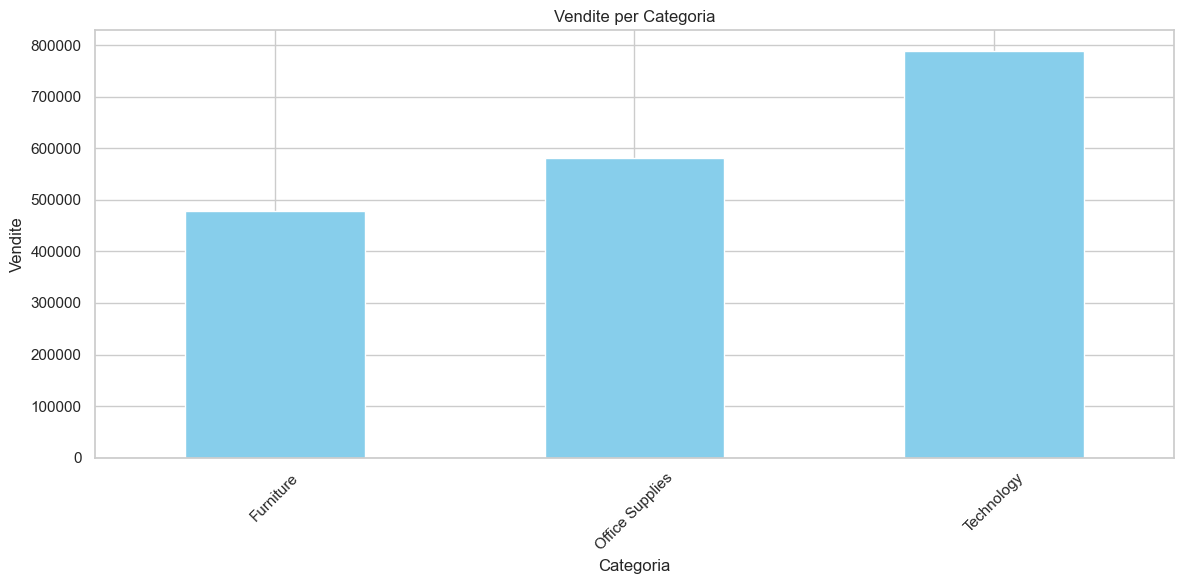

In [329]:
import matplotlib.pyplot as plt

cat_sales.plot(kind='bar', color='skyblue')
plt.title("Vendite per Categoria")
plt.xlabel("Categoria")
plt.ylabel("Vendite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Emerge:** da un'esplorazione generale del dataset, La categoria [Technology] domina nettamente le vendite totali dello Store.


In [330]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')


### 📊 Come si evolvono le vendite per categoria nel tempo? 

**Obiettivo:** Identificare i trend mensili delle categorie principali per monitorare crescita, flessioni e picchi stagionali.

**Insight attesi:**
- La categoria *Technology* potrebbe mostrare trend crescenti verso fine anno (es. periodo natalizio).
- *Furniture* e *Office Supplies* potrebbero avere andamenti più stabili o ciclici.

**Domande utili:**
- Ci sono mesi in cui una categoria domina nettamente?
- Le vendite seguono un andamento stagionale o sono stabili?

> 🔍 Questa analisi è fondamentale per prendere decisioni di marketing e gestione del magazzino.


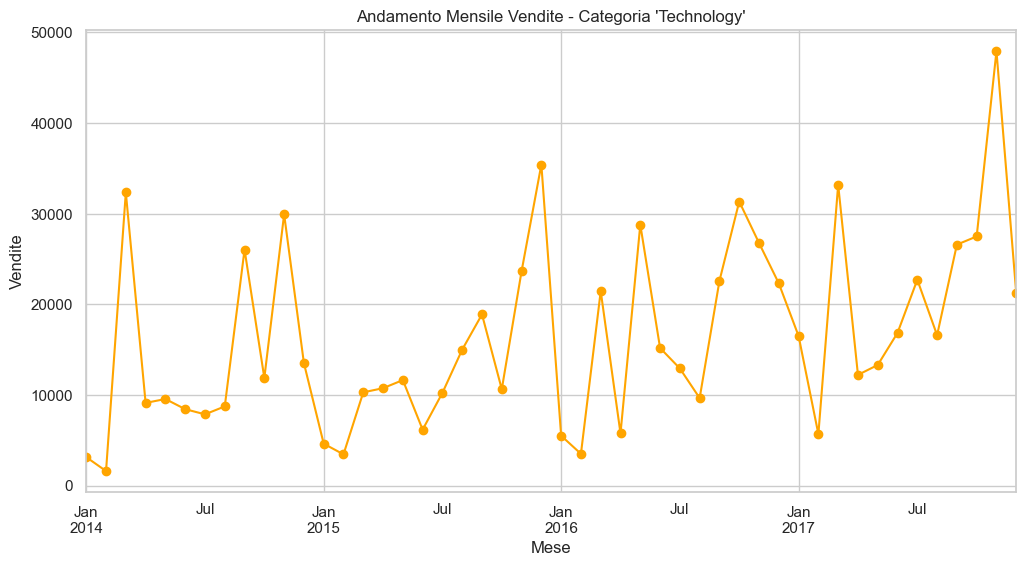

In [331]:
#VENDITE CATEGORIE PER MESE
top_category = df.groupby('Category')['Sales'].sum().idxmax()
df_top_cat = df[df['Category'] == top_category]

monthly_sales = df_top_cat.groupby(df_top_cat['Order Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title(f"Andamento Mensile Vendite - Categoria '{top_category}'")
plt.ylabel("Vendite")
plt.xlabel("Mese")
plt.grid(True)
plt.show()

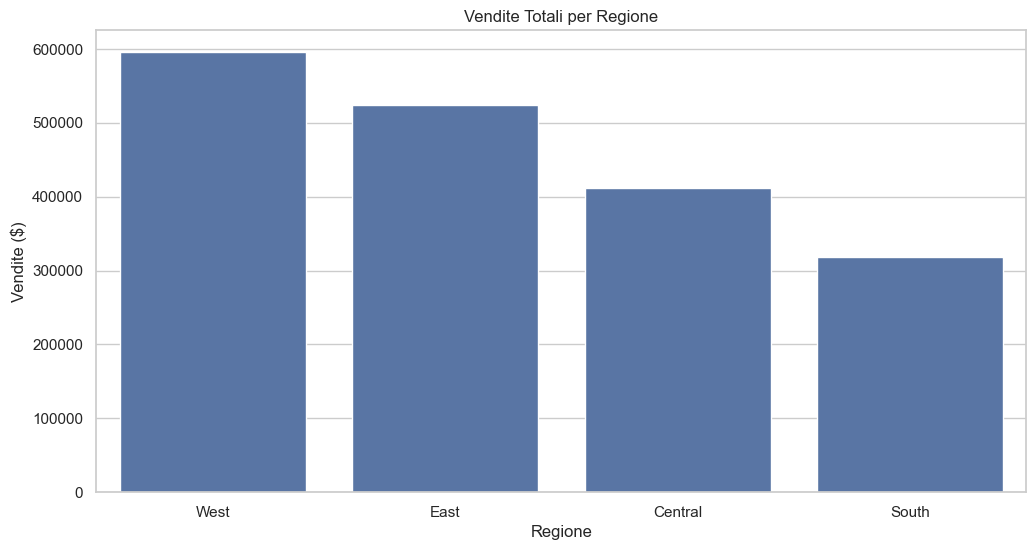

In [332]:
# Vendite totali per regione
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Vendite Totali per Regione")
plt.ylabel("Vendite ($)")
plt.xlabel("Regione")
plt.show()


In [333]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit;', 'Shipping Duration', 'YearMonth']


In [334]:
df.columns = df.columns.str.strip().str.replace(';', '', regex=False)
df["Profit"] = df["Profit"].astype(str).str.replace(";", "")  # elimina i punti e virgole concatenati
df["Profit"] = df["Profit"].str.replace(",", ".")             # nel caso usi virgola per decimali
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")   # converti in float

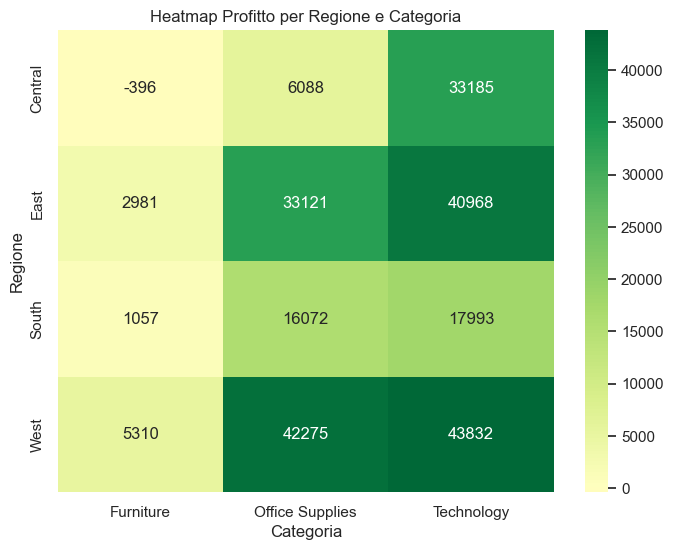

In [335]:
# VENDITE CATEGORIE PER REGIONE
pivot = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='RdYlGn', center=0)
plt.title("Heatmap Profitto per Regione e Categoria")
plt.ylabel("Regione")
plt.xlabel("Categoria")
plt.show()


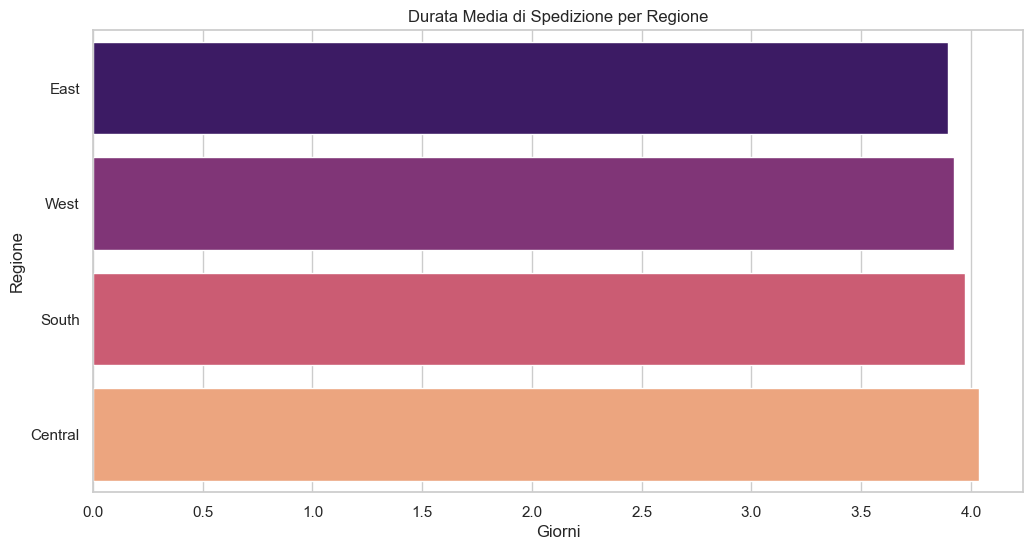

In [336]:
# Ricrea un DataFrame da avg_shipping
avg_shipping_df = avg_shipping.reset_index()
avg_shipping_df.columns = ['Region', 'Shipping Duration']

# Grafico con hue e palette assegnata
sns.barplot(
    data=avg_shipping_df,
    x='Shipping Duration',
    y='Region',
    hue='Region',
    palette='magma',
    legend=False  # Evitiamo la leggenda duplicata
)

plt.title("Durata Media di Spedizione per Regione")
plt.xlabel("Giorni")
plt.ylabel("Regione")
plt.show()

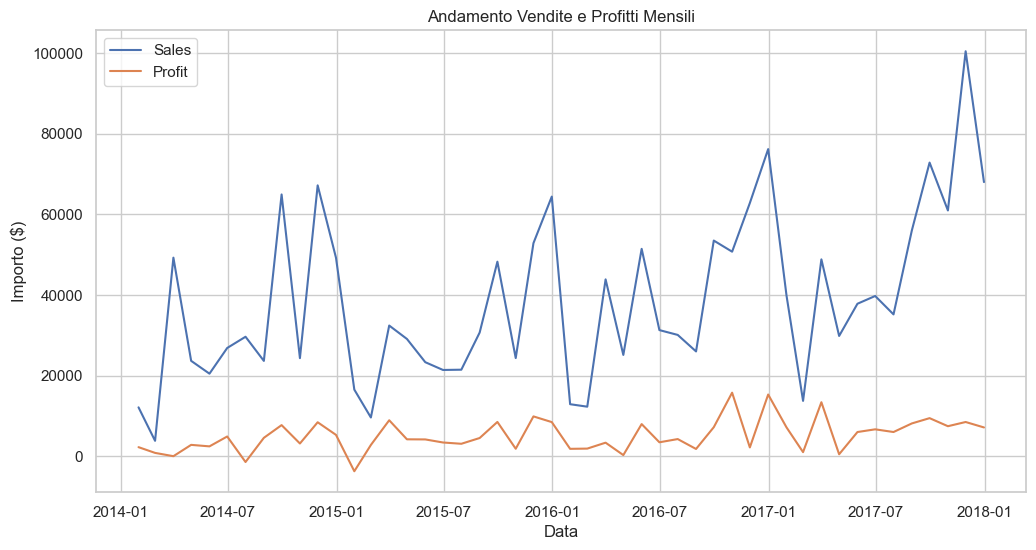

In [337]:
#ANALISI DELLE VENDITE NEL TEMPO
# Creazione colonna "Year" e "Month"
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df_monthly = df.resample('ME', on='Order Date').sum(numeric_only=True)

plt.plot(df_monthly.index, df_monthly['Sales'], label='Sales')
plt.plot(df_monthly.index, df_monthly['Profit'], label='Profit')
plt.title("Andamento Vendite e Profitti Mensili")
plt.xlabel("Data")
plt.ylabel("Importo ($)")
plt.legend()
plt.show()


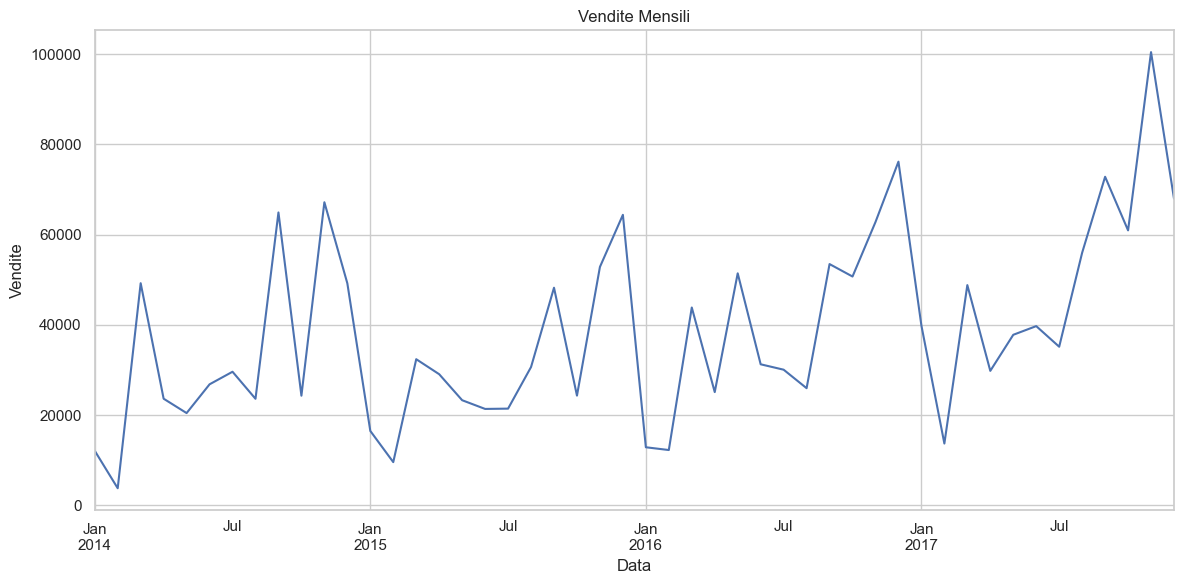

In [338]:
df.set_index('Order Date')['Sales'].resample('ME').sum().plot()
plt.title("Vendite Mensili")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribuzione Durata Spedizione (giorni)')

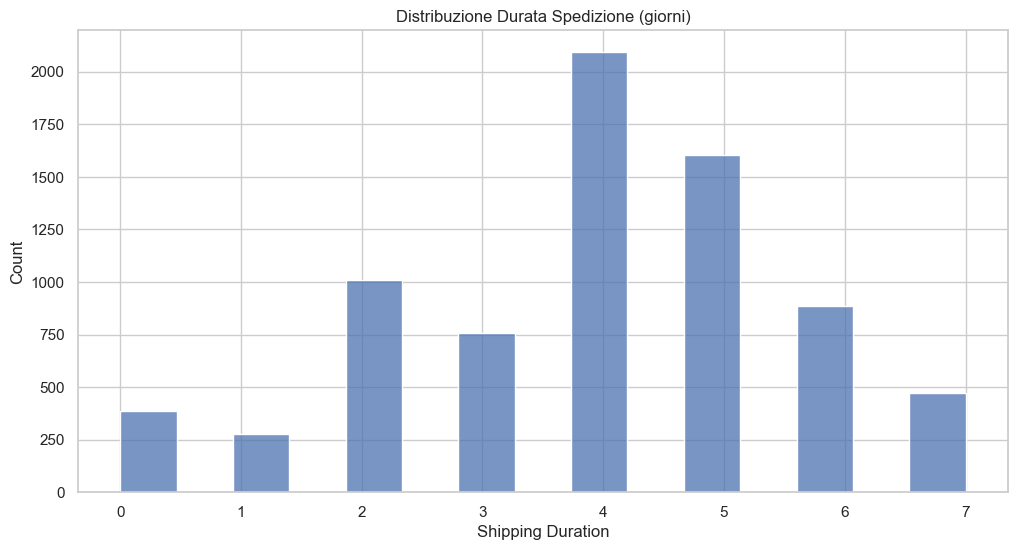

In [339]:
# ANALISI SPEDIZIONE
sns.histplot(df['Shipping Duration'], bins=15)
plt.title("Distribuzione Durata Spedizione (giorni)")


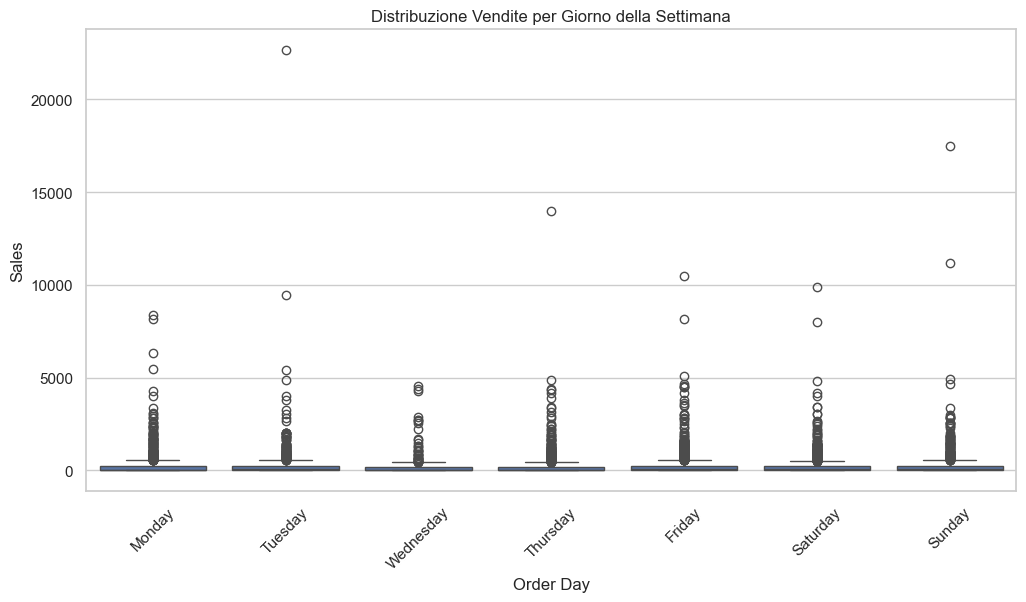

In [340]:
#MAPPING VENDITE PER GIORNO DELLA SETTIMANA
df['Order Day'] = df['Order Date'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x='Order Day', y='Sales', data=df, order=order)
plt.title("Distribuzione Vendite per Giorno della Settimana")
plt.xticks(rotation=45)
plt.show()
